In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 

In [4]:
Kyphosis_df = pd.read_csv(r"C:\Users\mdaum\Downloads\kyphosis.csv")

In [5]:
Kyphosis_df.info

<bound method DataFrame.info of    Kyphosis  Age  Number  Start
0    absent   71       3      5
1    absent  158       3     14
2   present  128       4      5
3    absent    2       5      1
4    absent    1       4     15
..      ...  ...     ...    ...
76  present  157       3     13
77   absent   26       7     13
78   absent  120       2     13
79  present   42       7      6
80   absent   36       4     13

[81 rows x 4 columns]>

In [7]:
Kyphosis_df.head

<bound method NDFrame.head of    Kyphosis  Age  Number  Start
0    absent   71       3      5
1    absent  158       3     14
2   present  128       4      5
3    absent    2       5      1
4    absent    1       4     15
..      ...  ...     ...    ...
76  present  157       3     13
77   absent   26       7     13
78   absent  120       2     13
79  present   42       7      6
80   absent   36       4     13

[81 rows x 4 columns]>

In [ ]:
Kyphosis_df.head

In [13]:
Kyphosis_df


,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


Data Visualization

In [15]:
Kyphosis_True = Kyphosis_df[Kyphosis_df['Kyphosis']==1]
Kyphosis_False = Kyphosis_df[Kyphosis_df['Kyphosis']==0]
print( 'Disease present after operation percentage =', (len(Kyphosis_True) / len(Kyphosis_df) )*100,"%")

Disease present after operation percentage = 20.98765432098765 %


<AxesSubplot: >

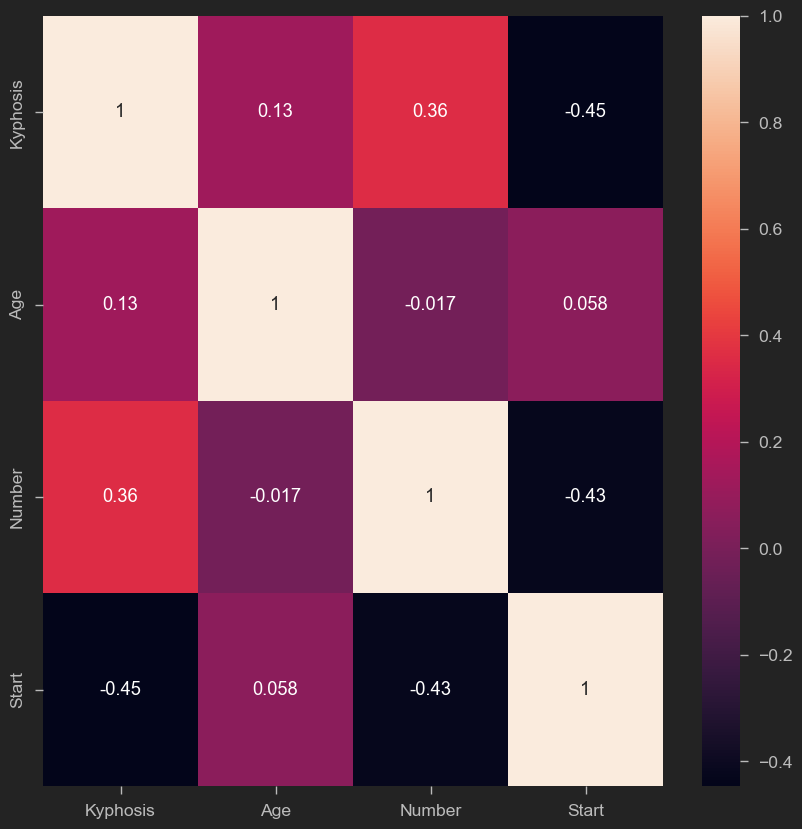

In [16]:
plt.figure(figsize=(10,10)) 
sns.heatmap(Kyphosis_df.corr(),annot = True)

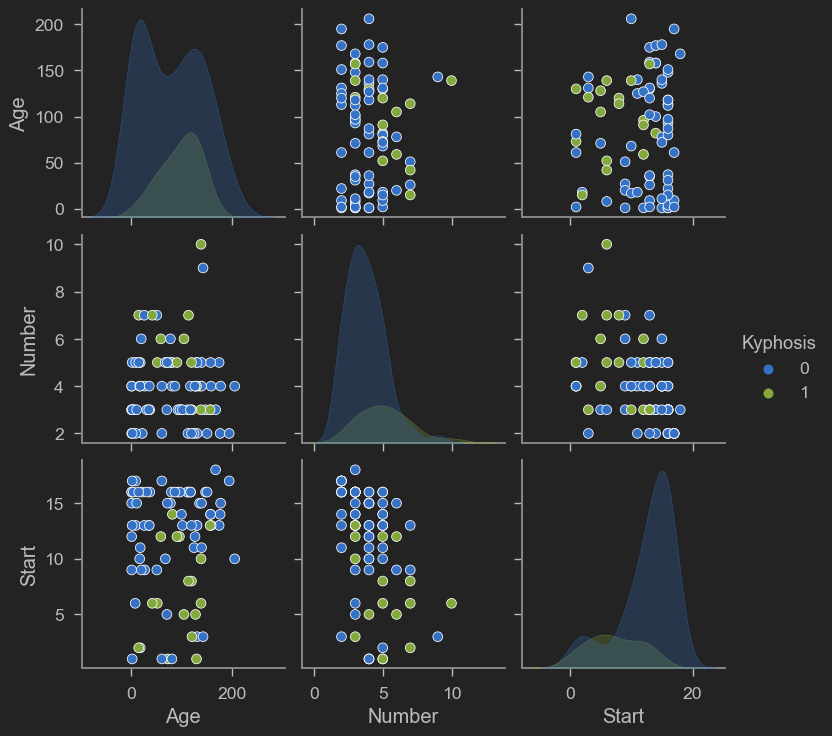

In [18]:
sns.pairplot(Kyphosis_df,hue="Kyphosis")


In [20]:
#Creating test and training datasest/data cleaning
X =Kyphosis_df.drop(["Kyphosis"],axis=1)
y= Kyphosis_df["Kyphosis"]

In [21]:
X

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [22]:
y

0     0
1     0
2     1
3     0
4     0
     ..
76    1
77    0
78    0
79    1
80    0
Name: Kyphosis, Length: 81, dtype: int32

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

In [26]:
X_train.shape

(64, 3)

In [27]:
y_train.shape

(64,)

In [28]:
X_test.shape

(17, 3)

In [29]:
y_test.shape

(17,)

In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [31]:
#Evaluating trained model performance
from sklearn.metrics import classification_report,confusion_matrix

<AxesSubplot: >

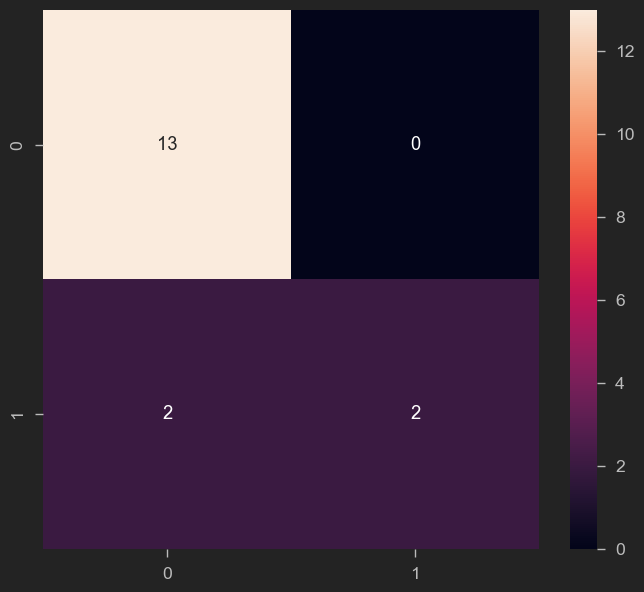

In [34]:
#predicting the test set results
y_predict_test = model.predict(X_test)
cm= confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm,annot=True)

model predictions are row and real results are colummn.
model accurately predicted 15 samples correctly and 2 samples incorrectly

In [35]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        13
           1       1.00      0.50      0.67         4

    accuracy                           0.88        17
   macro avg       0.93      0.75      0.80        17
weighted avg       0.90      0.88      0.87        17



In [50]:
# random forest and decision tree classifier models
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train,y_train)

DecisionTreeClassifier()

<AxesSubplot: >

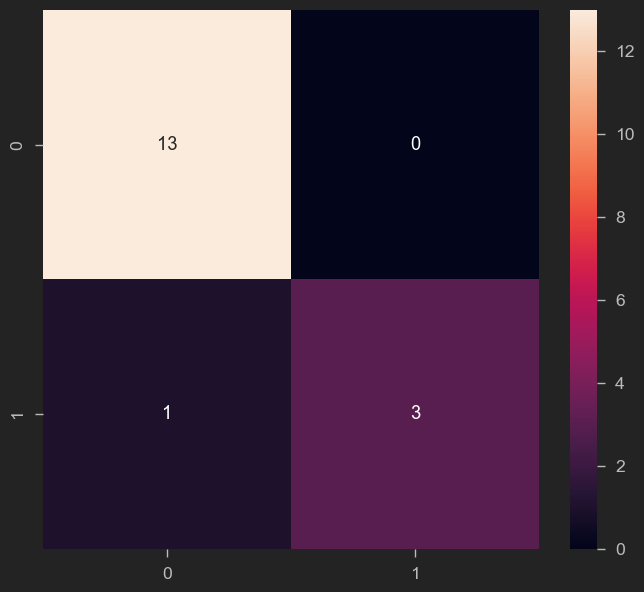

In [51]:
y_predict_test = decision_tree_model.predict(X_test)
cm= confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm,annot=True)

this decission tree model has a better accuracy than the logistic regression model 

In [52]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.75      0.86         4

    accuracy                           0.94        17
   macro avg       0.96      0.88      0.91        17
weighted avg       0.95      0.94      0.94        17



In [53]:
feature_importance= pd.DataFrame(decision_tree_model.feature_importances_,index= X_train.columns,columns = ["importance"]).sort_values("importance",ascending=False)
print(feature_importance)

        importance
Age       0.496471
Start     0.265708
Number    0.237821


In [54]:
#random Forest Classification
from sklearn.ensemble import RandomForestClassifier
forest_model= RandomForestClassifier()
forest_model.fit(X_train,y_train)

RandomForestClassifier()

<AxesSubplot: >

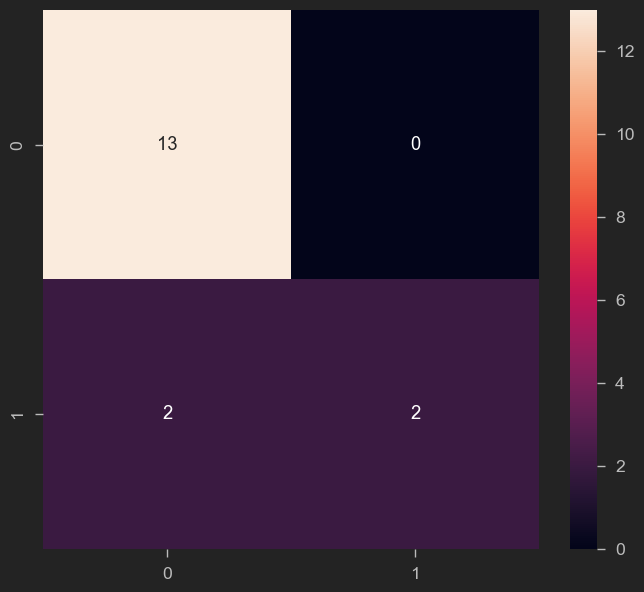

In [55]:
y_predict_forest = forest_model.predict(X_test)
cm = confusion_matrix(y_test,y_predict_forest)
sns.heatmap(cm,annot= True)

In [56]:
print(classification_report(y_test,y_predict_forest))
feature_importance= pd.DataFrame(forest_model.feature_importances_,index= X_train.columns,columns = ["importance"]).sort_values("importance",ascending=False)
print(feature_importance)

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        13
           1       1.00      0.50      0.67         4

    accuracy                           0.88        17
   macro avg       0.93      0.75      0.80        17
weighted avg       0.90      0.88      0.87        17

        importance
Age       0.411952
Start     0.381781
Number    0.206267
